In [2]:
import numpy as np
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

2024-03-18 01:02:20.840669: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 01:02:20.843447: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 01:02:20.950393: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 01:02:21.376757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 01:02:22.841958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
x_train,x_test = x_train/255.0,x_test/255.0

In [4]:
# x_train,x_test = x_train[:1000],x_test[:500]
# y_train,y_test = y_train[:1000],y_test[:500]


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy = model.fit(x_train,y_train,epochs=10)

/home/nomura/ML/env_tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
 337/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2286 - loss: 2.0713

KeyboardInterrupt: 

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print("\n Test accurancy:",test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7039 - loss: 0.9221

 Test accurancy: 0.7038999795913696


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


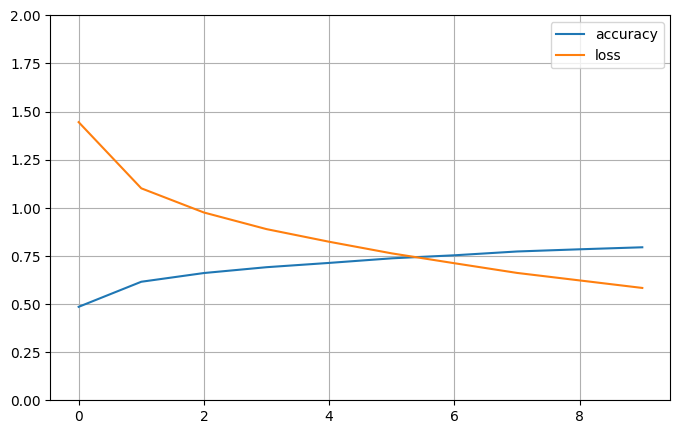

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(histroy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [ ]:
print(model.layers)

NameError: name 'model' is not defined